# Task 1 - PREDICTION USING UNSUPERVISED ML

## By Gayatri Chandola

## OBJECTIVE

 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## LOAD THE DATASET

In [2]:
# Reading the dataset
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df= pd.DataFrame(data)                     # converting dataset into a dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Shape of dataset
df.shape

(150, 6)

It shows that there are 150 rows and 6 columns in this dataset

In [5]:
# First 5 rows of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Last 5 rows of dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.drop('Id', axis=1, inplace=True)            # remove unnecessary features

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Sum of null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

0 null values in both the columns

In [12]:
# Checking for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [13]:
# Sum of Duplicate values
df.duplicated().sum()

3

3 duplicate values in the dataset

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
# Statistical analysis of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# Correlation between features
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


## DATA VISUALIZATION

<AxesSubplot:xlabel='Species', ylabel='count'>

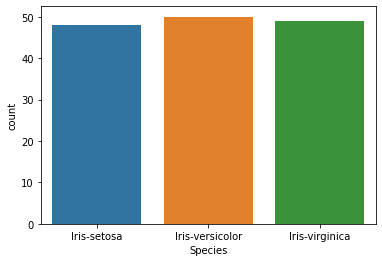

In [17]:
sns.countplot(x='Species', data=df) 

All the 3 Categories are almost equally distributed

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

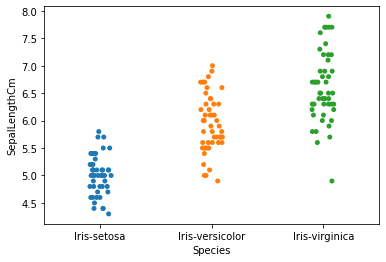

In [18]:
sns.stripplot(x='Species',y='SepalLengthCm',data=df)

Iris-virginica is having more Sepal Length than other categories

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

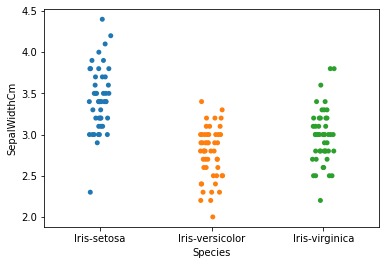

In [19]:
sns.stripplot(x='Species',y='SepalWidthCm',data=df)

Iris-setosa is having more Sepal Width than other 2 categories

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

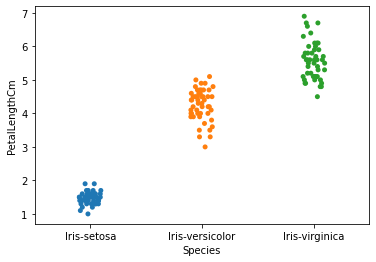

In [20]:
sns.stripplot(x='Species',y='PetalLengthCm',data=df)

Iris-virginica have more Petal Length

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

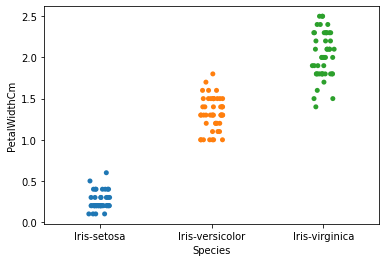

In [21]:
sns.stripplot(x='Species',y='PetalWidthCm',data=df)

Iris-virginica have more Petal Width

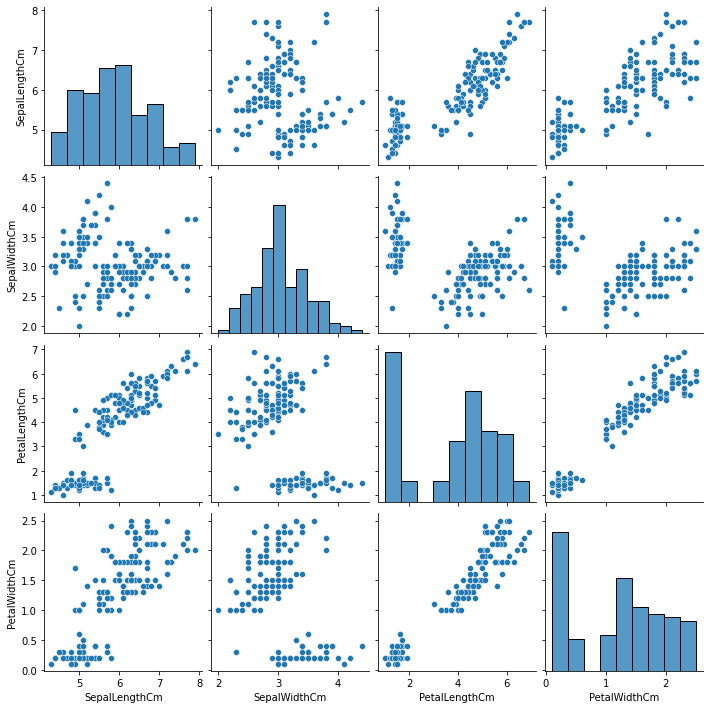

In [22]:
sns.pairplot(df)

<AxesSubplot:>

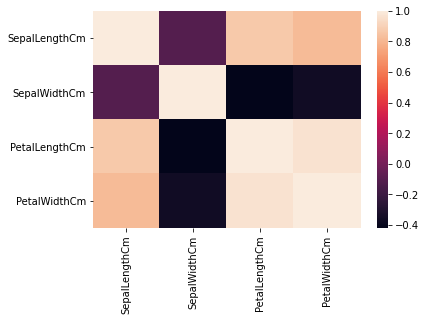

In [23]:
sns.heatmap(df.corr())                  # correlation between all the features

# K-Means Clustering

## Data Preprocessing and Scaling

In [24]:
# Scaling of the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_df = sc.fit_transform(df.iloc[:,[0,1,2,3]])
std = pd.DataFrame(std_df)
std

,0,1,2,3
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682
143,0.536792,-1.276136,0.695748,0.915085
144,0.778842,-0.128082,0.809831,1.047484
145,0.415766,0.790361,0.923913,1.444682


In [25]:
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(std.iloc[:,[0,1,2,3]])                 # By default it is taking 8 no. of clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmean.cluster_centers_                         # By default 8 centroids and 8 clusters

array([[-1.4298661 , -0.05632882, -1.361302  , -1.34397496],
       [ 0.4359373 , -0.80415816,  0.78447884,  0.79004149],
       [ 2.11011764,  1.55572974,  1.49432549,  1.35641552],
       [-0.56251966,  1.99581694, -1.28643536, -1.23640067],
       [ 1.23066869,  0.06326009,  1.07982575,  1.14457692],
       [-0.37954125, -1.40734186,  0.09545678, -0.01170877],
       [ 0.2230228 , -0.14509037,  0.38730275,  0.31683721],
       [-0.97602203,  0.91664658, -1.31210392, -1.22978071]])

## Determine optimal value of k for clusters

In [28]:
SSE =[]
for cluster in range(1,10):
    kmeans= KMeans(n_clusters = cluster)
    kmeans.fit(std)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

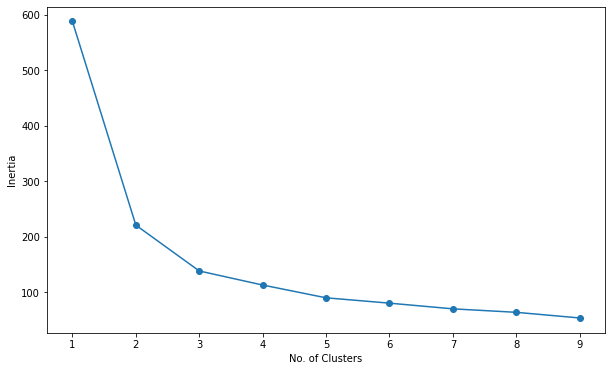

In [29]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize= (10,6))
plt.plot(frame['Cluster'],frame['SSE'], marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

Now we will take no. of clusters= 3

## Data Fitting and applying K-Means Clustering

In [30]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(std.iloc[:,[0,1,2,3]])                 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
Centroid= pd.DataFrame(kmean.cluster_centers_)               # Now we got 3 centroids
Centroid

,0,1,2,3
0,-0.066006,-0.878733,0.328271,0.258182
1,-1.023928,0.862114,-1.322086,-1.269500
2,1.118742,0.091758,0.987022,1.010863


In [32]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [33]:
df['cluster']= kmean.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [34]:
df['cluster'].value_counts(),df['Species'].value_counts()

(0    52
 1    48
 2    47
 Name: cluster, dtype: int64,
 Iris-versicolor    50
 Iris-virginica     49
 Iris-setosa        48
 Name: Species, dtype: int64)

## Visualization of the Clusters and Centroids

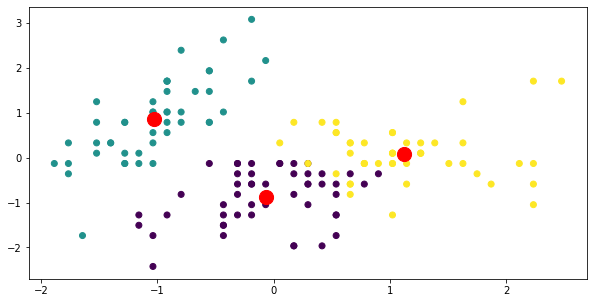

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(std.iloc[:,0],std.iloc[:,1], c= kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], s=200,  c='red', label= 'Centroids')
plt.show()

## THANK YOU